<a href="https://colab.research.google.com/github/YunYunSeoJANG/Lab02_05/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra for Electrical Systems Homework 1
### <i> Kmeans and KNN -- DUE 09/20

#####  - Professor Young Min Kim
#####  - TAs: Junho Lee, Hojun Jang
#####  - TA email: twjhlee@snu.ac.kr
***
We will not accept any late work. Please pay attention to the due date!

### <b> Problem 1 - K means clustering
##### In this problem you will be asked to fill in the blanks to implement K means clustering algorithm via python.
##### Please read the comments carefully and fill in the TODO marks

In [ ]:
# Import necessary libraries - Do not import more
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [ ]:
# Next import data and change to shapes we can easily use
df = px.data.iris()
X_s = []
for idx in range(len(df)):
    X_element = [
        df['sepal_length'][idx],
        df['sepal_width'][idx],
        df['petal_width'][idx]
    ]
    X_s.append(X_element)
X_s = np.array(X_s)
# X_s is now an array of dimension(N, D), where N is the number of datapoints and D is the number of features for each datapoint
# For this problem each datapoint consists of 3 variables: sepal length, sepal width, and petal width

In [155]:
from ast import GeneratorExp
from pygments.token import Generic
# This python class will be the main target of the problem. Fill in the blanks to correctly implement Kmeans algorithm.
class KMeansClustering:
    def __init__(self, X, K):
        """ Init function. We will save the input parmeters and initialize centroids
        [Args]:
            X : N x D np.ndarray of N datapoints each with D features
            K : The number of clusters to consider
        """
        self.K = K
        self.X = X
        self.N, self.D = X.shape

        ############################### TODO ###################################
        self.cluster=[]#centroid 의 X의 원소들이 어떤 centroid에 배정되었는지 확인
        for i in range(self.N):
          self.cluster.append(0)
        self.cluster=np.array(self.cluster)

        self.Z=[]#centriod 의 좌표
       # print (self.X)
        sample=[]
        r=-1
        for i in range(self.K):
          while ((r==-1) or (r in sample) or ((np.dot(X[r],X[r])>=float('inf')))): # or (np.dot(X[r],X[r])<0)):
            r=random.randint(0,self.N)
          sample.append(r)
          self.Z.append(self.X[r])
        self.Z=np.array(self.Z)

    def assign_cluster(self):
        """This function assigns each datapoint to the nearest cluster. 
        The distance metric is L2 distance
        """
        ############################### TODO ###################################
        for i in range (self.N):
          choose_z=0
          d=np.dot(self.X[i],self.Z[0])
          for j in range (1,self.K):
            test_d=np.dot(self.X[i]-self.Z[j],self.X[i]-self.Z[j])
            if (d>test_d):
              d=test_d
              choose_z=j
          self.cluster[i]=choose_z
        

    def update_centroid(self):
        """This function updates centroids according to current assignment of clusters.
        For each cluster, calculate the mean of each cluster and update its centroid.
        """
        ############################### TODO ###################################
        

        for i in range(self.K):
          G=0
          self.Z[i]=[0,0,0]
          for j in range(self.N):
            if (self.cluster[j]==i and np.dot(self.X[j],self.X[j])<float('inf')):
              G+=1
              self.Z[i]+=self.X[j]
          for l in range(self.K):
            if (G!=0):
              self.Z[i][l]*=(1/G)

         

    def calculate_distance(self):
        """This function calcuates the average distance from each datapoint to its assigned cluster.
        Return the distance.
        """
        ############################### TODO ###################################
        d=0
        for i in range(self.N):
          d_plus=(np.dot(self.X[i]-self.Z[self.cluster[i]],self.X[i]-self.Z[self.cluster[i]])) #**(0.5) 해 주는 것인가???
          if (d_plus<float('inf')): 
            d+=d_plus
        d/=self.N
        return d
        

    def run(self, steps=100):
        """This function runs K means clustering for given number of iterations. 
        For each iteration, you should assign clusters, update centroids and
        report the final distance metric from each datapoint to its respective centroids.
        Return the calculated distance
        """
        ############################### TODO ###################################
        for i in range (steps):
          self.assign_cluster()
          self.update_centroid()
          self.visualize()
          print(self.calculate_distance())
        return self.calculate_distance()        


    def visualize(self):
        """This fuction visualizes the current clusters"""
        color_list = np.random.rand(self.K)
        colors = []
        for _idx in range(len(self.X)):
            colors.append(color_list[self.cluster[_idx]])
        colors = np.array(colors)
        #print(colors)

        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(projection='3d')
        ax.scatter(X_s[:, 0], X_s[:, 1], X_s[:, 2], c=colors)

        #for i in range(self.K):
        #  ax.scatter(self.Z[i][0],self.Z[i][1],self.Z[i][2])

        ax.set_xlabel('sepal_length')
        ax.set_ylabel('sepal_width')
        ax.set_zlabel('petal_width')
        plt.show()

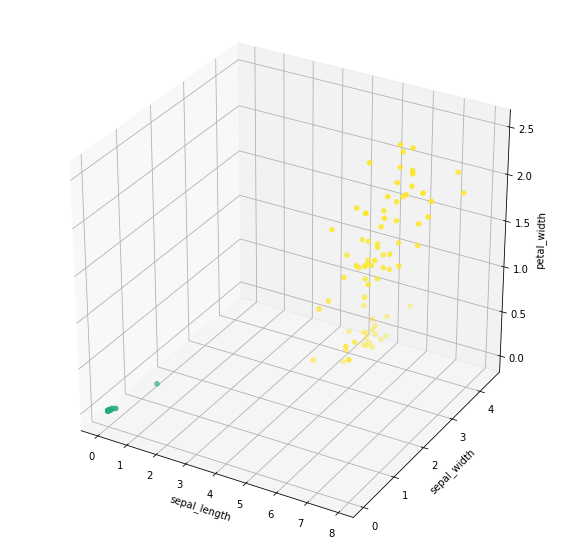

0.8163740804354175


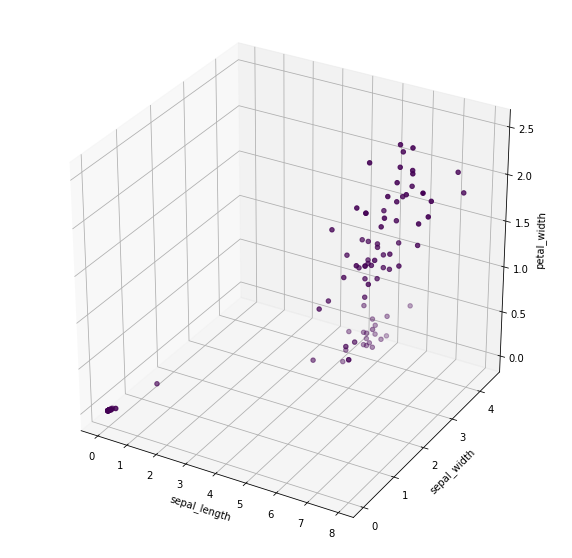

9.1309011526819


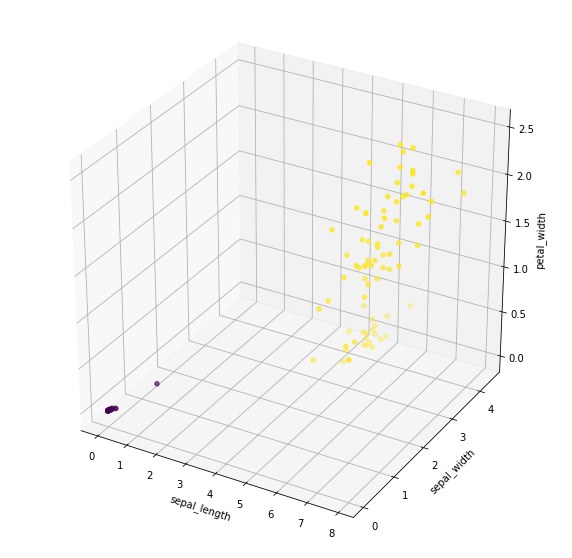

0.8164094793475664


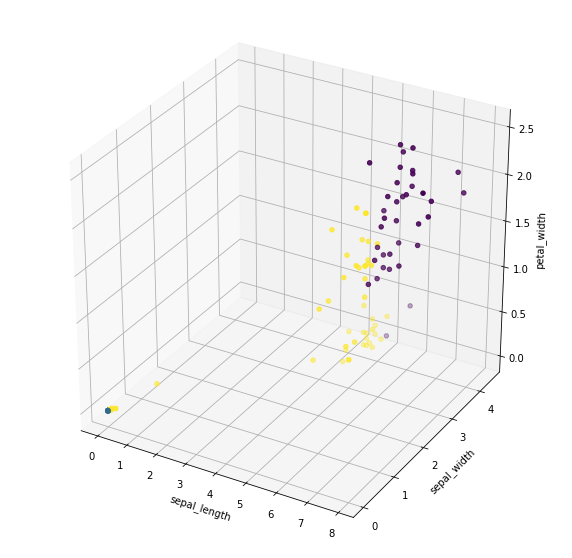

2.5154572950028


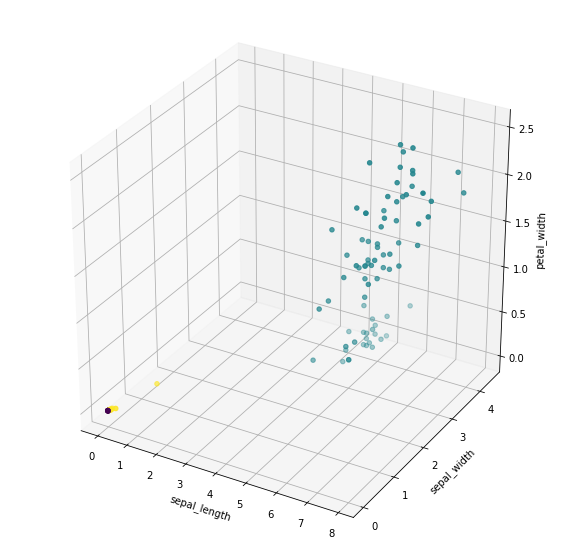

0.8152996193549155


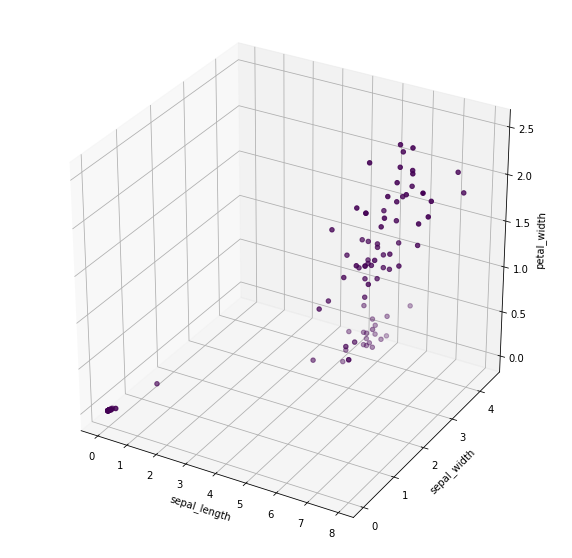

9.1309011526819


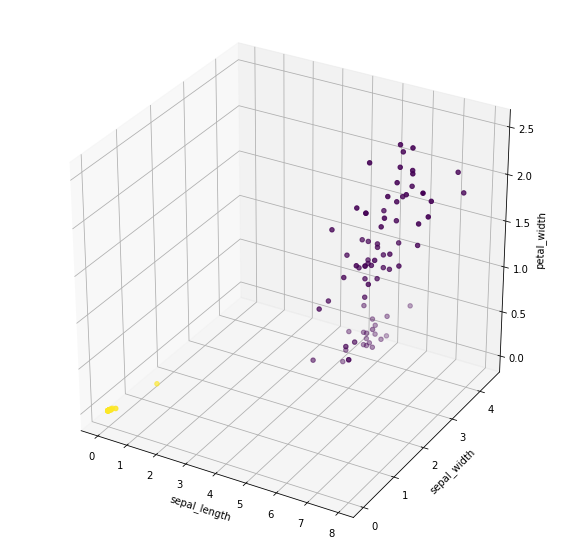

0.8164094793475664


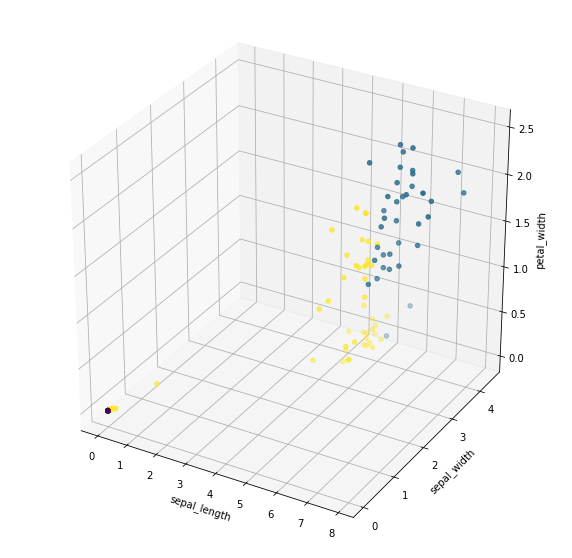

2.5154572950028


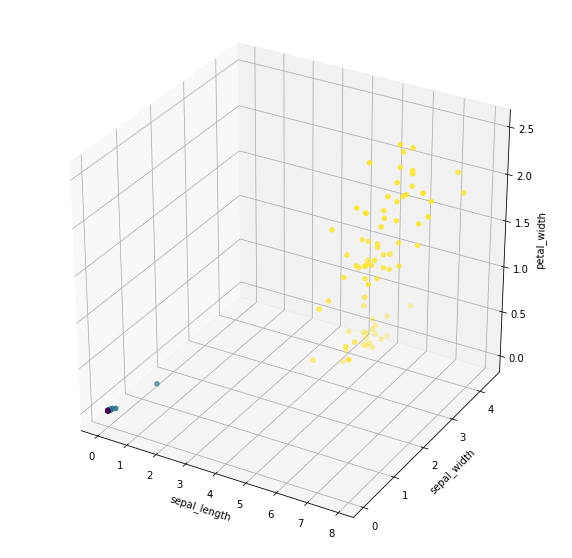

0.8152996193549155


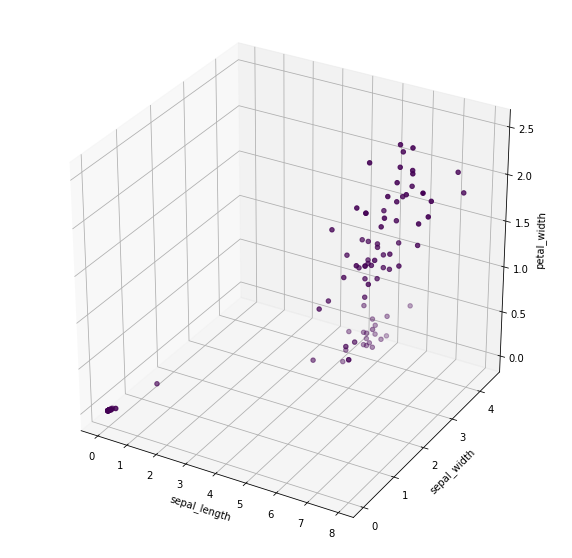

9.1309011526819
For K : 3 the distance was 9.1309011526819


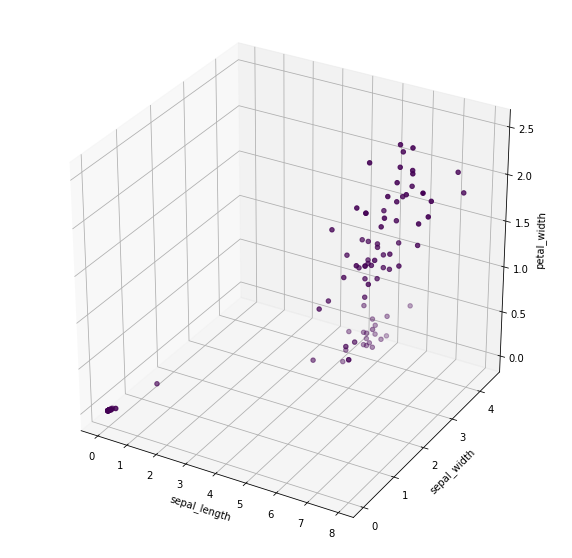

In [156]:
# Initialize Kmeans model and start clustering!
# You may change K and steps if you want!
K = 3
Kmeans = KMeansClustering(X_s, K)

# run the Kmeans clustering algorithm for 10 steps
dist = Kmeans.run(steps=10)
print("For K : {} the distance was {}".format(K, dist))
Kmeans.visualize()

### <b> Problem 2 - KNN classification
##### In this problem you will be asked to fill in the blanks to classify a new datapoint via KNN algorithm.
##### Please read the comments carefully and fill in the TODO marks

In [ ]:
# Again, import data and change to a form we can easily use
train_X = []
test_X = []
train_Y = []
test_Y = []

for idx in range(len(df)):
    X_element = [
        df['sepal_length'][idx],
        df['sepal_width'][idx],
        df['petal_width'][idx]
    ]
    Y_element = [
        df['species_id'][idx]
    ]

    if idx % 5 != 0:
        train_X.append(X_element)
        train_Y.append(Y_element)
    else:
        test_X.append(X_element)
        test_Y.append(Y_element)
X_train = np.array(train_X)
X_test = np.array(test_X)
y_train = np.array(train_Y)
y_test = np.array(test_Y)

# With this, train_X is an N x D array with N datapoints each with D features(sepal length, sepal width, petal width)
# train_y contains the groundtruth labels(species id) for each train_X datapoint
# In the rest of this question you will be asked to predict the species id for unknown datapoints

In [ ]:
# This python class contains all necessary functions for a KNN classifier.
class KNN:
    """ k-nearest neighbor classifier class """

    def train(self, X, y):
        """ Train the classifier using the given training data (X, y).
        [Args]:
            X: A numpy array of shape (N, D), where N is the number of data points, D is the dimensionality of each data point.
            y: A numpy array of shape (N,) containing the training labels.
        """
        ############################### TODO ###################################

    def inference(self, X_test, k=1): 
        """ For each test example in X, this method predicts its label by majority vote
        from the k nearest training samples. It returns the predicted labels. 
        [Args]:
            X: A numpy array of shape (N, D), where N is the number of data points, D is the dimensionality of each data point.
            k: The number of neighbors to participate in voting.
        [Returns]:
            y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
        where y_pred[i] is the predicted label for the test point X[i].
        """
        # Compute the distance matrix below with the given metric.
        dists = self.compute_distance(X_test)
        
        # Predict the labels with the distance matrix.
        y_pred = self.predict_labels(X_test, dists, k)

        return y_pred

    def euclidean(self, x1, x2):
        """Calculate and return euclidean distance between x1 and x2
        [Args] 
            x1: Datapoint 1
            x2: Datapoint 2
        [Returns]
            dist: Euclidean distance between input
        """
        ############################### TODO ###################################

    def compute_distance(self, X_test):
        """Computes the distance between the training data and test data, 
        [Args]:
            X_test: A numpy array of shape (N, D), where N is the number of test data points, D is the dimensionality of each data point.
            X_train: A numpy array of shape (M, D), where M is the number of training data points, D is the dimensionality of each data point.
        [Returns]:
            dists: A numpy array of shape (N, M) containing the distances
        """
        N = X_test.shape[0]
        M = self.X_train.shape[0]
        dists = np.zeros((N, M))
        for i in range(N):
            for j in range(M):
                dists[i, j] = self.euclidean(X_test[i].squeeze(), self.X_train[j].squeeze())
        return dists

    def predict_labels(self, X_test, dists, k):
        """For the given test image, this method takes a majority vote from k closest points
        to predict the class of the test image.
        [Args]:
            X_test: A numpy array of shape (N, D), where N is the number of test data points, D is the dimensionality of each data point.
            dists: A numpy array of shape (N, M) containing distances between
            k: The number of neighbors to participate in voting.
        [Returns]:
            y_pred: A numpy array of shape (N,) containing predicted labels for the test data
        """
        ############################### TODO ###################################


    def evaluate(self, y_pred, y):
        """
        Compares the predicted labels to the ground truth y, and prints the classification accuracy.
        [Args]:
            y_pred: A numpy array of shape (N,) containing predicted labels
            y: A numpy array of shape (N,) containing the groundtruth labels
        
        [Returns]:
            accuracy
        """
        y_pred = np.expand_dims(y_pred, axis=1)
        num_correct = np.sum(y_pred == y)
        accuracy = float(num_correct) / y.shape[0]
        return accuracy

In [ ]:
# Now let's start classifying!
model = KNN()
model.train(X_train, y_train)

# Model used to test the performance.
K = 15
y_pred = model.inference(X_test, k=K)
acc = model.evaluate(y_pred, y_test)
# print("Accuarcy:", acc)

# Modify the number of k's and metrics to try as you want
num_ks = 50 # number of k's
metrics = ['l2']

# Run experiments
print_k_interval = 5
result = dict(zip(metrics, [[] for _ in range(len(metrics))]))
for metric in metrics:
    print("running KNN with {} distance metric".format(metric))
    for k in range(1, num_ks+1):
        if k % print_k_interval==0:
            print("    processing... k={:3d}".format(k))
        y_pred = model.inference(X_test, k=k)
        acc = model.evaluate(y_pred, y_test)
        result[metric].append(acc)
    print()

# Visualize and report the results
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

x_axis = np.arange(1, num_ks+1, 1)
for i, metric in enumerate(metrics):
    ax.scatter(x_axis, result[metric], label = metric)

ax.set(title="K-Nearest Neighbor Accuracies on different Ks")
ax.set(xlabel='K', ylabel='Accuracy')
ax.set(xticks=np.arange(0, num_ks+1,5), yticks=np.arange(0.5,1.0,0.05))
ax.legend()
plt.show()
